# mobile net for raspberrypi

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from PIL import Image
import glob
import numpy as np
import pickle
import os

def open_pickle_and_marge(path_to_pickle):
    print("Generating test data start")
    x_train_files = glob.glob(path_to_pickle + '/x_train_*.pickle')
    X = np.array([])
    Y = np.array([])

    for i, x_train_file in enumerate(x_train_files):
        suffix_and_extension = x_train_file.split("/")[-1].lstrip("x_train_")
        y_train_file = path_to_pickle + '/y_train_' + suffix_and_extension

#         print(y_train_file)
        print(".", end="")

        with open(x_train_file, mode='rb') as f:
            x_train = pickle.load(f)

        with open(y_train_file, mode='rb') as f:
            y_train = pickle.load(f)

        if i == 0:
            X = np.array(x_train)
            Y = np.array(y_train)
        else:
            X = np.append(X, x_train, axis=0)
            Y = np.append(Y, y_train)
        del x_train, y_train
    print("")
    print("Generating test data finished")
    return X, Y

In [0]:
path = "/content/drive/My Drive/Colab Notebooks/TPU/train_data/for_lt_20190731"
x_train, y_train = open_pickle_and_marge(path)

Generating test data start
......................................................
Generating test data finished


In [0]:
for i, y in enumerate(y_train):
  print(y, end="")
  if i % 100 == 99:
    print("")

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

label is :  0


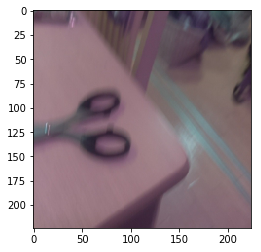

label is :  0


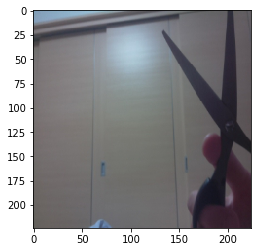

label is :  1


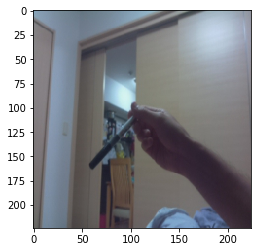

label is :  1


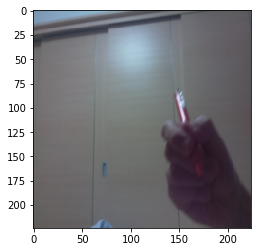

label is :  1


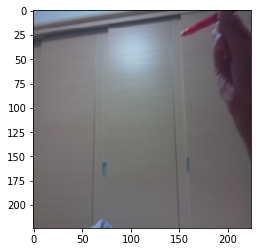

label is :  1


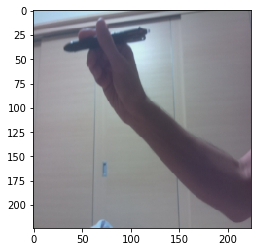

label is :  1


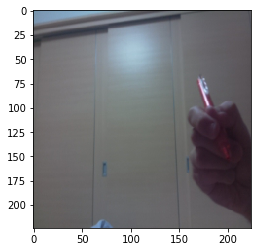

label is :  1


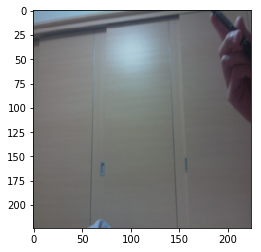

label is :  1


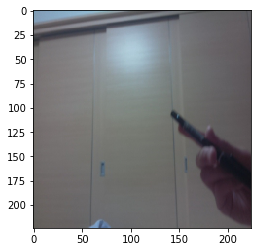

label is :  1


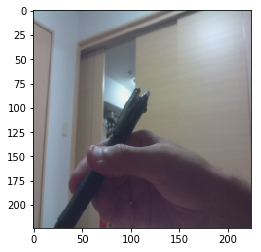

In [0]:
# x_train.shape
# y_train.shape
import matplotlib.pyplot as plt
i = 1000

for index, y in enumerate(y_train[i:i+10]):
#   if y > 10:
    print("label is : ", y)
    plt.imshow(x_train[i+index]/255)
    plt.show()

In [0]:
# import matplotlib.pyplot as plt
# for x, y in zip(x_train[0:4], y_train[0:4]):
#   plt.imshow(x)
#   plt.show()
#   print("label is : ", y)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [0]:
print(y_valid)

[4 2 1 ... 0 4 0]


In [0]:
# from tensorflow.keras.backend import clear_session
# clear_session()

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.backend import clear_session
clear_session()

# 必要なパッケージのインポート
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.applications.mobilenet_v2 import MobileNetV2

def generate_model():
#     model = MobileNetV2(weights=None, classes=5)
    model = Sequential()
    
#     first_filter_num = 16
#     model.add(Conv2D(first_filter_num, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
#     model.add(Conv2D(first_filter_num, (3, 3), activation='relu'))
#     model.add(Conv2D(first_filter_num, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(8, (3, 3), activation='relu'))
#     model.add(Conv2D(8, (3, 3), activation='relu'))
#     model.add(Conv2D(8, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(4, (3, 3), activation='relu'))
#     model.add(Conv2D(4, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(4, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Flatten())
#     model.add(Dense(15, activation='relu'))
#     model.add(Dropout(0.25))
#     model.add(Dense(5, activation='softmax'))

# 　⬇︎これは動いた奴
#     model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
#     model.add(Conv2D(16, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(16, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(16, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(16, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Flatten())
#     model.add(Dense(20, activation='relu'))
#     model.add(Dropout(0.25))
#     model.add(Dense(5, activation='softmax'))

    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(5, activation='softmax'))
    
    return model


In [0]:
from keras.backend import clear_session
clear_session()

img_height, img_width = x_train[0].shape[0], x_train[0].shape[1]

model = generate_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 218, 218, 16)      2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 108, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 108, 108, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 106, 106, 8)       1160      
__________

In [0]:
y_train.shape

(4097,)

In [0]:
import tensorflow.keras as keras

# 0-255の整数値を0〜1の小数に変換する
# MNISTって必ずこの処理入るけれど、意味あるのかな
# x_train_norm = x_train/255
# x_valid_norm = x_valid/255
x_train_norm = x_train
x_valid_norm = x_valid
# x_test /= 255

# one-hot vector形式に変換する
y_train_categorical = keras.utils.to_categorical(y_train, 5)
y_valid_categorical = keras.utils.to_categorical(y_valid, 5)
# y_test = keras.utils.to_categorical(y_test, 5)

In [0]:
y_valid_categorical

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.optimizers import RMSprop
# from keras.optimizers import Adam
import keras as keras


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# model.compile(loss='categorical_crossentropy',
#               optimizer=adam,
#               metrics=['accuracy'])

# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])

history = model.fit(x_train_norm, y_train_categorical,
                    batch_size=128,
                    epochs=80,
                    verbose=1,
                    validation_data=(x_valid_norm, y_valid_categorical))

Train on 4097 samples, validate on 1025 samples
Epoch 1/80
4097/4097 [==============================] - 24s 6ms/step - loss: 0.4396 - acc: 0.8145 - val_loss: 0.4123 - val_acc: 0.8517
Epoch 2/80
4097/4097 [==============================] - 24s 6ms/step - loss: 0.4014 - acc: 0.8296 - val_loss: 0.4059 - val_acc: 0.8332
Epoch 3/80
4097/4097 [==============================] - 24s 6ms/step - loss: 0.3831 - acc: 0.8389 - val_loss: 0.3813 - val_acc: 0.8576
Epoch 4/80
4097/4097 [==============================] - 24s 6ms/step - loss: 0.3806 - acc: 0.8367 - val_loss: 0.5217 - val_acc: 0.8010
Epoch 5/80
4097/4097 [==============================] - 24s 6ms/step - loss: 0.3924 - acc: 0.8362 - val_loss: 0.3769 - val_acc: 0.8488
Epoch 6/80
4097/4097 [==============================] - 24s 6ms/step - loss: 0.3708 - acc: 0.8462 - val_loss: 0.4102 - val_acc: 0.8429
Epoch 7/80
4097/4097 [==============================] - 24s 6ms/step - loss: 0.4188 - acc: 0.8269 - val_loss: 0.3764 - val_acc: 0.8546
Epoch 8

In [0]:
score = model.evaluate(x_train_norm, y_train_categorical, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15148103340144284
Test accuracy: 0.9463021723212106


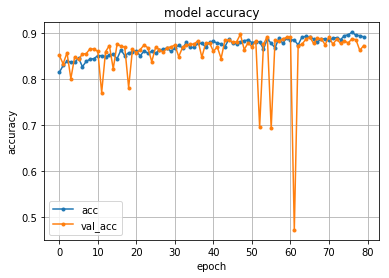

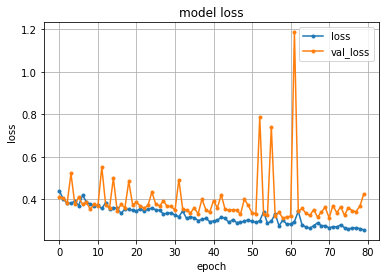

In [0]:
from matplotlib import pyplot as plt

# 精度のplot
plt.plot(history.history['acc'], marker='.', label='acc')
plt.plot(history.history['val_acc'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# 損失のplot
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [0]:
i = 300
results = model.predict(x_train[i:i+10])

label is :  1
result is :  [6.7207870e-14 1.0000000e+00 2.4836012e-08 1.3093992e-17 5.6732258e-11]


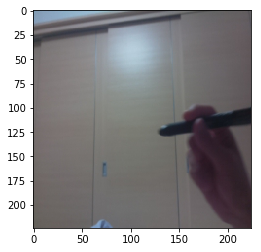

label is :  2
result is :  [1.16449804e-07 1.04808537e-02 9.89289343e-01 2.27492594e-04
 2.09930431e-06]


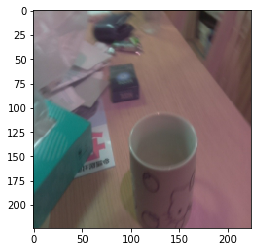

label is :  3
result is :  [0.15719625 0.14528072 0.03558375 0.59123343 0.07070576]


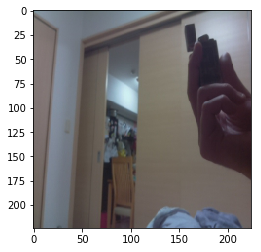

label is :  4
result is :  [2.7825552e-21 1.5009727e-21 1.3390356e-16 5.1246887e-18 1.0000000e+00]


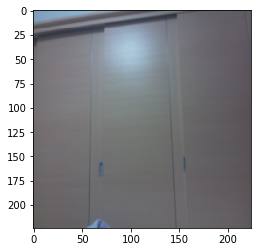

label is :  1
result is :  [1.6840328e-13 9.9999976e-01 2.1852883e-07 3.0294440e-15 1.0943731e-10]


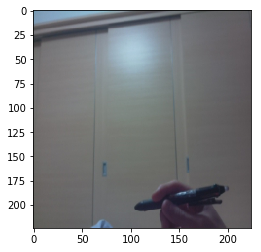

label is :  3
result is :  [7.1127834e-16 2.0804265e-09 2.4074549e-02 9.7592545e-01 2.2234601e-21]


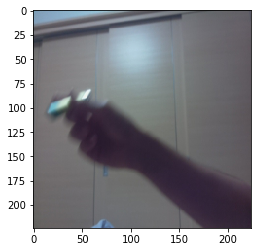

label is :  3
result is :  [2.2096527e-18 2.9835797e-12 2.6155442e-03 9.9738449e-01 6.3427143e-23]


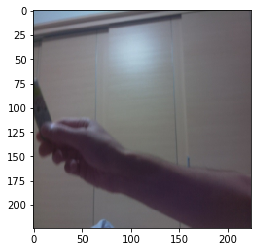

label is :  1
result is :  [0.19688116 0.512687   0.01256747 0.25076872 0.0270957 ]


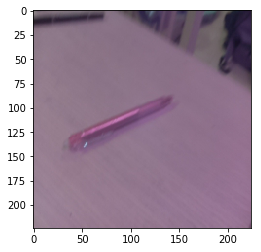

label is :  3
result is :  [1.4577995e-17 1.2889913e-10 8.7654941e-02 9.1234511e-01 6.2354116e-23]


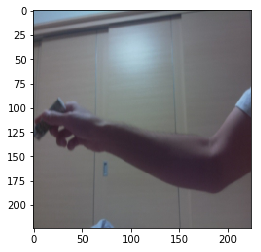

label is :  2
result is :  [1.7021535e-13 1.6705265e-10 5.3079140e-01 4.6920860e-01 8.7402094e-20]


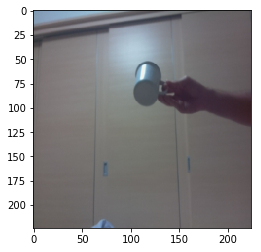

In [0]:
import matplotlib.pyplot as plt
for x, y, result in zip(x_train[i:i+10], y_train[i:i+10], results):
  print("label is : ", y)
  print("result is : ", result)
  plt.imshow(x/255)
  plt.show()

In [0]:
#  include_optimizer の値は失敗に関係ない・・・多分
model.save('model.h5', include_optimizer=True)
# model.save('model.h5', include_optimizer=False)

# model.save('model.h5')

In [0]:
# from tensorflow.keras.backend import clear_session
# clear_session()

import tensorflow as tf
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file("model.h5")
# converter.post_training_quantize = True

# converter.inference_type=tf.lite.constants.FLOAT
converter.inference_type=tf.compat.v1.lite.constants.QUANTIZED_UINT8
# converter.inference_type=tf.uint8

converter.quantized_input_stats = {"conv2d_1_input":(0, 1)}
converter.default_ranges_stats = (0, 255)


tflite_quantized_model = converter.convert()
open("tflite_quantized_model.tflite", "wb").write(tflite_quantized_model)

37400

In [0]:
import numpy as np
import tensorflow as tf

# TFLiteモデルの読み込み
interpreter = tf.lite.Interpreter(model_path="tflite_quantized_model.tflite")
# メモリ確保。これはモデル読み込み直後に必須
interpreter.allocate_tensors()

# 学習モデルの入力層・出力層のプロパティをGet.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
input_details

[{'dtype': numpy.uint8,
  'index': 3,
  'name': 'conv2d_1_input',
  'quantization': (1.0, 0),
  'shape': array([  1, 224, 224,   3], dtype=int32)}]

In [0]:
output_details

[{'dtype': numpy.uint8,
  'index': 33,
  'name': 'dense_2/Softmax',
  'quantization': (0.00390625, 0),
  'shape': array([1, 5], dtype=int32)}]

[  0   0 128 128   0]


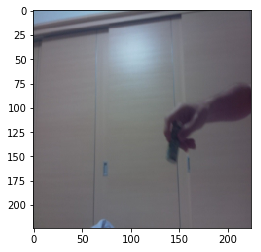

[184  68   1   1   1]


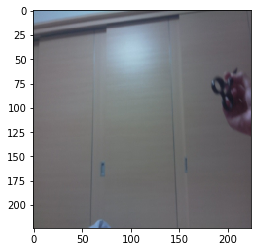

[255   1   0   0   0]


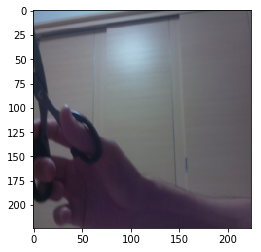

[51 51 51 51 51]


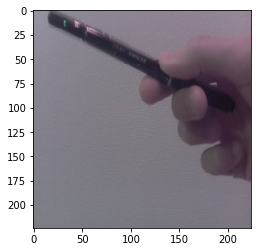

[ 22 166  22  22  22]


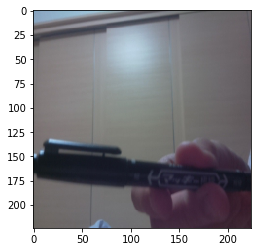

[  1 253   1   1   1]


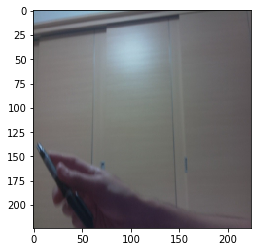

[  4   4   4 239   4]


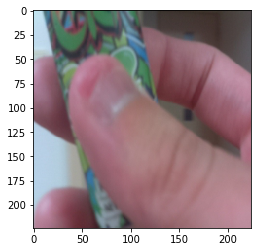

[  0   0   0   0 255]


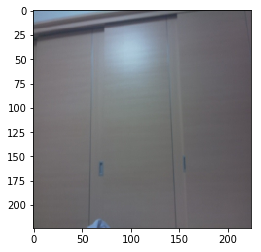

[  0   0   0   0 255]


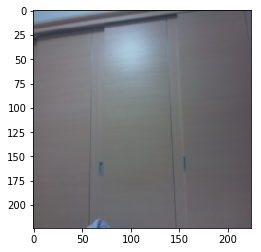

[255   1   0   0   0]


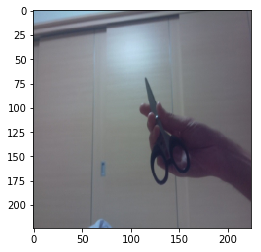

[254   2   0   0   0]


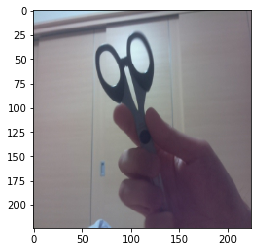

[  0   0   0   0 255]


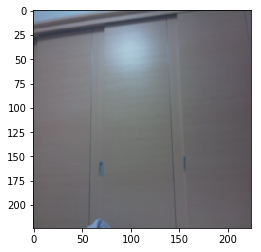

[  0   0  12 244   0]


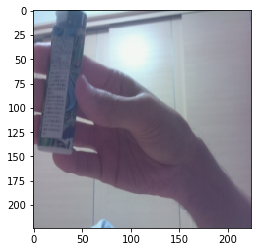

[  0   0   0   0 255]


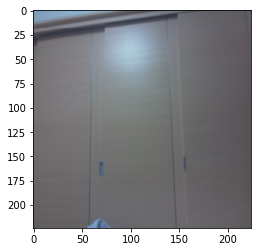

[69 25 69 25 69]


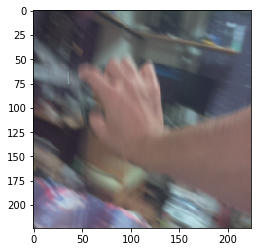

[  1 253   1   1   1]


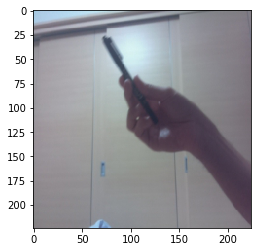

[  0   0   0   0 255]


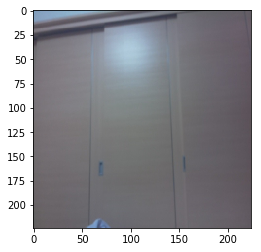

[  0   0 255   0   0]


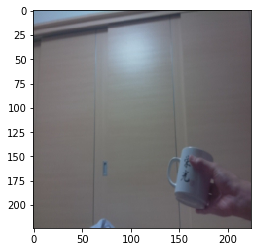

[  0   0   0   0 255]


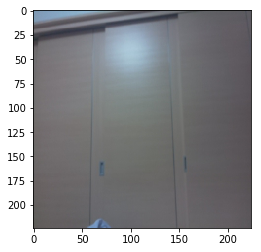

[  0   0   0   0 255]


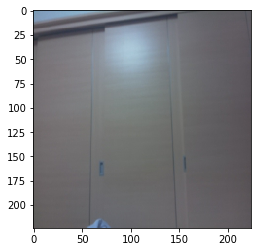

3


[array([  0,   0, 128, 128,   0], dtype=uint8),
 array([184,  68,   1,   1,   1], dtype=uint8),
 array([255,   1,   0,   0,   0], dtype=uint8),
 array([51, 51, 51, 51, 51], dtype=uint8),
 array([ 22, 166,  22,  22,  22], dtype=uint8),
 array([  1, 253,   1,   1,   1], dtype=uint8),
 array([  4,   4,   4, 239,   4], dtype=uint8),
 array([  0,   0,   0,   0, 255], dtype=uint8),
 array([  0,   0,   0,   0, 255], dtype=uint8),
 array([255,   1,   0,   0,   0], dtype=uint8),
 array([254,   2,   0,   0,   0], dtype=uint8),
 array([  0,   0,   0,   0, 255], dtype=uint8),
 array([  0,   0,  12, 244,   0], dtype=uint8),
 array([  0,   0,   0,   0, 255], dtype=uint8),
 array([69, 25, 69, 25, 69], dtype=uint8),
 array([  1, 253,   1,   1,   1], dtype=uint8),
 array([  0,   0,   0,   0, 255], dtype=uint8),
 array([  0,   0, 255,   0,   0], dtype=uint8),
 array([  0,   0,   0,   0, 255], dtype=uint8),
 array([  0,   0,   0,   0, 255], dtype=uint8)]

In [0]:
index = 100
num = 20
test_datum = x_train[index : index + num]
# print(test_datum)

output_datum = []
for test_data in test_datum:
  interpreter.set_tensor(input_details[0]['index'], np.array([test_data], dtype = np.uint8))
  interpreter.invoke()
  output_datum.append(interpreter.get_tensor(output_details[0]['index'])[0])
  print(interpreter.get_tensor(output_details[0]['index'])[0])
  plt.imshow(test_data/255)
  plt.show()

#   print(float(test_data)/255.0, ":",output_data)

import math
import matplotlib.pyplot as plt
print(y_train[index])
output_datum
# plt.plot(output_datum)

In [0]:
from google.colab import files
files.download('tflite_quantized_model.tflite')